## Case Study: Classification

The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.

**Will the customer accept the credit card offer? Y/N**

#### Glossary
EDA = exploratory data analysis<br/>
data_num = numerical dataframe <br/>
data_cat = categorical datafrmae <br/>
avg = average<br/>
X    - iteration 1(directly after pre processing)<br/>
X_i2 - iteration 2(balancing)<br/>
X_i3 - iteration 3(dropping)<br/>
X_i4 - iteration 4(???)<br/>

The **definition of the features** is the following:
- **Customer Number:** A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted:** Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Mailer Type:** Letter or postcard.
- **Income Level:** Low, Medium or High.
- **#Bank Accounts Open:** How many non-credit-card accounts are held by the customer.
- **Overdraft Protection:** Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating:** Low, Medium or High.
- **#Credit Cards Held:** The number of credit cards held at the bank.
- **#Homes Owned:** The number of homes owned by the customer.
- **Household Size:** Number of individuals in the family.
- **Own Your Home:** Does the customer own their home? (Yes or No).
- **Average Balance:** Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4
- **Balance:** Average balance for each quarter in the last year


# 1. EDA

In the EDA we want to familirize ourselves with the data set. We are going to look at the following steps:

## Cleaning & Wrangling
 
- assess metrics (min/max difference features, check for outliers to clean)
- check shape
- data types (correct type for model, same units?)
- null values, white spaces, duplicates, (amount)unique values per col /unique(written same), mislabeled classes (male ≠ Male), typos/inconsistent capitalisation, irrelevant columns
- missing data

## Visualisations

- explore the relationships


## Preprocessing

- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)


## Cleaning & Wrangling

In [6]:
# import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# load dataset into a pandas dataframe
# renaming columns
data = pd.read_csv('/Users/josephinebiedermann/Desktop/DABC2021/GitHub/ProjectsPhine/Week5/ironhack-case-study-classification/data_sets/creditcardmarketing.csv', header = None)

In [7]:
data.columns = ['customer_number','offer_accepted','reward','mailer_type', 'income_level','bank_accounts_open','overdraft_protection','credit_rating','credit_cards_held','homes_owned','household_size','own_home','avg_balance','q1_balance','q2_balance','q3_balance','q4_balance']

In [8]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


### Assess dataframe

In [9]:
# assess shape
data.shape

(18000, 17)

In [10]:
# assess column names
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_home', 'avg_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

In [11]:
#data types of columns
data.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_home                 object
avg_balance             float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [12]:
# list of columns, their non-null objects and data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_home              18000 non-null  object 
 12  avg_balance           17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

- 'customer_number' as this is only an index, which we already have, so we dont need it twice.<br/><br/>
- The rest of the data types look suiting to their description.

In [13]:
#check, if there are any nulls and NaN values in our data set
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_home                 0
avg_balance             24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

We can see that there are 24 entries for avg balance and q1-q5 balances, that have null values.<br/>
We suspect, that these 24 values are all the same rows for the 5 features.
24 out of 18.000 values is a faily small amount, which would justify to either drop the rows or replace the null values with the mean.<br/>
We will do so in the data cleaning phase.

In [14]:
# assess df's duplicated values
sum(data.duplicated())

0

Next step is to look at the **unique values in the categorical features**:

In [15]:
# check unique values
data['offer_accepted'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# check unique values
data['reward'].unique()

array(['Air Miles', 'Cash Back', 'Points'], dtype=object)

In [17]:
# check unique values
data['mailer_type'].unique()

array(['Letter', 'Postcard'], dtype=object)

In [18]:
# check unique values
data['income_level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [19]:
# check unique values
data['overdraft_protection'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
# check unique values
data['credit_rating'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [21]:
# check unique values
data['own_home'].unique()

array(['No', 'Yes'], dtype=object)

All the unique values seem to be normal and expected.

We want to see the outliers in the numerical dataframe too.

In [22]:
# check for outliers in the numerical dataframe
data.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Numerical values seems valid, I don't see any outliers which would make our lives harder when training the model.

In [23]:
# check for null or NaN values
data['avg_balance'].isnull().values.any()

True

In [24]:
# check for null or NaN values
data['q1_balance'].isnull().values.any()

True

In [25]:
# check for null or NaN values
data['q2_balance'].isnull().values.any()

True

In [26]:
# check for null or NaN values
data['q3_balance'].isnull().values.any()

True

In [27]:
# check for null or NaN values
data['q4_balance'].isnull().values.any()

True

## Cleaning tasks
- drop 'customer_number' column
- drop null values
- convert float columns to int

In [28]:
# before cleaning, create a copy of the dataframe
data_copy = data.copy()

In [29]:
# drop customer_number column
data.drop(['customer_number'], axis=1, inplace=True)

In [30]:
#test
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [31]:
# drop rows with missing values
data = data.dropna()

In [32]:
#test 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   bank_accounts_open    17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   credit_cards_held     17976 non-null  int64  
 8   homes_owned           17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_home              17976 non-null  object 
 11  avg_balance           17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

In [33]:
# test2
data.isna().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_home                0
avg_balance             0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [34]:
# converting columns from float to int
#data = data.astype({"avg_balance":'int', "q1_balance":'int',"q2_balance":'int',"q3_balance":'int',"q4_balance":'int'}) 

In [35]:
#test 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17976 non-null  object 
 1   reward                17976 non-null  object 
 2   mailer_type           17976 non-null  object 
 3   income_level          17976 non-null  object 
 4   bank_accounts_open    17976 non-null  int64  
 5   overdraft_protection  17976 non-null  object 
 6   credit_rating         17976 non-null  object 
 7   credit_cards_held     17976 non-null  int64  
 8   homes_owned           17976 non-null  int64  
 9   household_size        17976 non-null  int64  
 10  own_home              17976 non-null  object 
 11  avg_balance           17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

### Visualisations

We want to find out which features makes the customer more prone to accept credit card offers, e.g. their income, or if they received the offer in mail vs. letter, how many houses they own, what is their average balance.

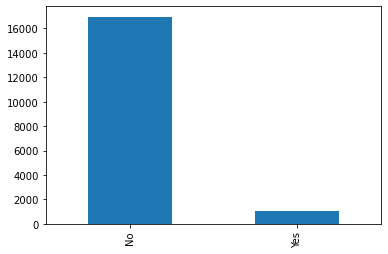

In [36]:
# who accepted the offer vs who didn't
data['offer_accepted'].value_counts().plot(kind="bar");

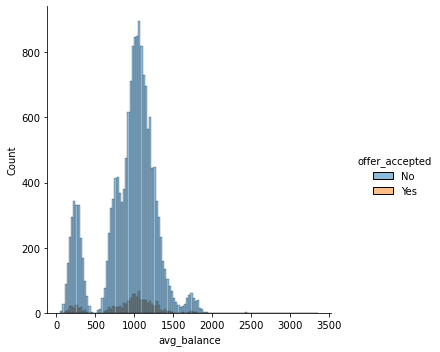

In [37]:
# what's the avg balance of customers who accepted the offer vs who didn't
sns.displot(data, x='avg_balance', hue='offer_accepted');

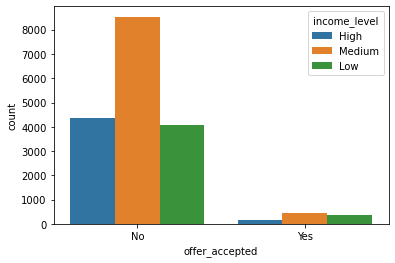

In [38]:
# different income levels of who accepted the offer vs who didn't
sns.countplot(data = data, x = 'offer_accepted', hue = 'income_level');

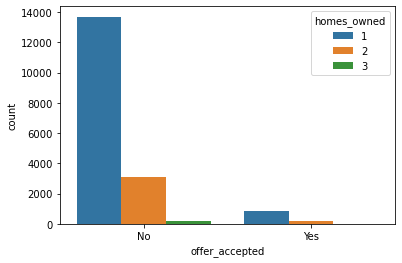

In [39]:
# amount of homes owned
sns.countplot(data = data, x = 'offer_accepted', hue = 'homes_owned');

Let's see the relationship between the quarters and offer accepted.

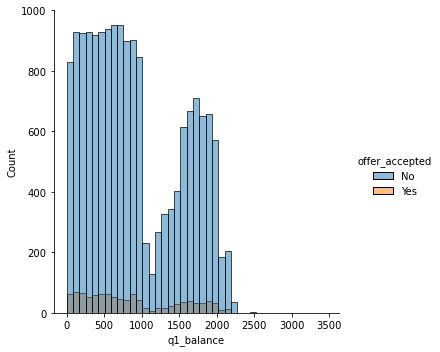

In [40]:
# what's the q1 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q1_balance', hue='offer_accepted');

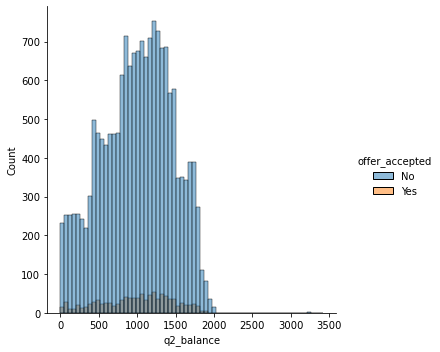

In [41]:
# what's the q2 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q2_balance', hue='offer_accepted');

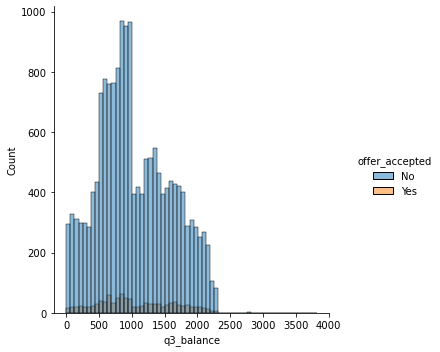

In [42]:
# what's the q3 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q3_balance', hue='offer_accepted');

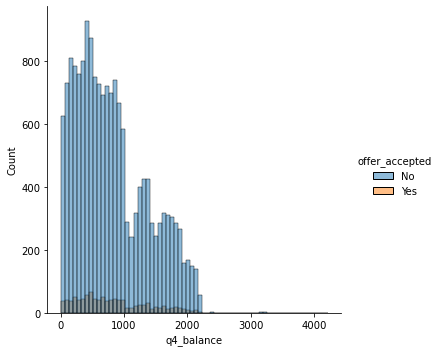

In [43]:
# what's the q4 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q4_balance', hue='offer_accepted');

### Summary of Visual Assessment

We concluded we might need to go back to the cleaning steps and
- drop the quarter columns
- turn a couple of numerical columns (bank_accounts_open, credit_card_holds, homes_owned, household_size) to categorical (1 to 'one', etc)

because it will cause noise in our model.

## Preprocessing


We'll be looking at 
- splitting into num and cat
- multicollinarity
- normalizer
- encoding into dummies

In [44]:
# split numerical and categorical data into two dataframes
data_num = data.select_dtypes(include=['number'])
data_num.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [45]:
# split numerical and categorical data into two dataframes
data_cat = data.select_dtypes(include=['object'])
data_cat.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


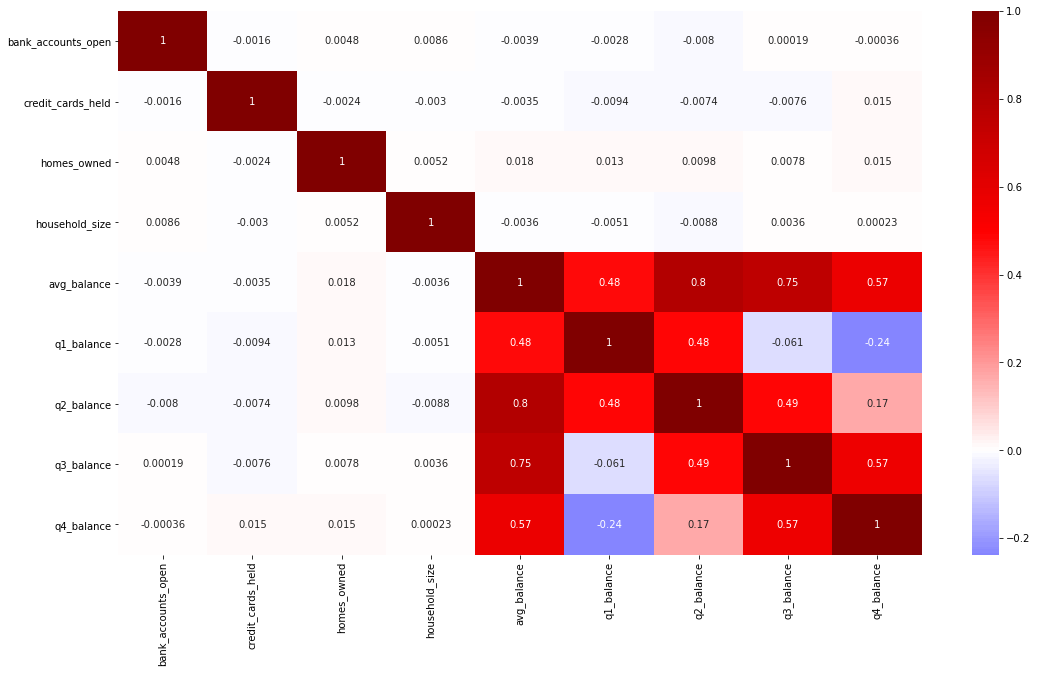

In [46]:
#correlation for numerial columns
corr_matrix = data_num.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='seismic', center = 0, annot=True);

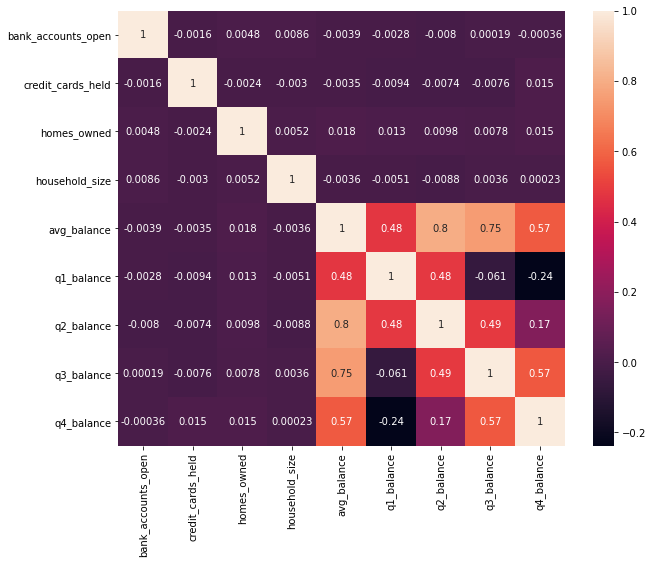

In [47]:
corr_matrix=data_num.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

The corr matrix tells us which features are messing up our matrix. We might need to go back to the cleaning steps and turn these features into categorical ones. 

In [48]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X = data_num

In [49]:
X.head(25)

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
5,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0
6,1,2,1,3,283.75,468.0,188.0,347.0,132.0
7,1,4,1,4,278.50,132.0,391.0,285.0,306.0
8,1,2,1,4,1005.00,894.0,891.0,882.0,1353.0
9,2,3,2,4,974.25,1814.0,1454.0,514.0,115.0


In [50]:
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [51]:
X = pd.DataFrame(x_normalized, columns=X.columns)

#### encoding cat features

In [52]:
data_cat.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_home'],
      dtype='object')

In [53]:
#we are now encoding the cat data
cat = pd.get_dummies(data_cat, columns =['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_home'], drop_first=True)
cat

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_home_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17995,0,1,0,0,0,0,0,1,0,1
17996,0,1,0,0,0,0,0,1,0,1
17997,0,1,0,0,0,0,0,1,0,0
17998,0,1,0,0,0,1,0,0,1,1


In [54]:
#we need to drop the target from the cat features
cat_clean = cat.drop(['offer_accepted_Yes'], axis=1)
cat_clean

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_home_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


**Spliting off depended variable (Label)**

**'offer_accepted_Yes'** because we want to predict if the customer accepts the offer<br/><br/>
offer accepted = YES = 1<br/>
offer not accepted = NO = 0<br/>

In [55]:
#defining the target y
y = cat['offer_accepted_Yes']
y

0        0
1        0
2        0
3        0
4        0
        ..
17995    0
17996    0
17997    0
17998    0
17999    0
Name: offer_accepted_Yes, Length: 17976, dtype: uint8

In [56]:
#checking the len of x_normalized & cat_clean before merginf back together in X
len(x_normalized), len(cat_clean)

(17976, 17976)

Both have the same length, so we can merge them in the next step.

In [57]:
#merging cat_clean and x_normalized into X

X = np.concatenate((x_normalized, cat_clean), axis=1)

### Modelling

- import model
- train test split
- apply model

**import model**

In [58]:
from sklearn.linear_model import LogisticRegression

**train test split**

splitting X and y each into 2 data sets(train data and test data)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=40)

**model development**
- create a Logistic Regression classifier (classification) object using LogisticRegression() function
- fit model on the train set using fit()

In [60]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter = 400, multi_class='ovr').fit(X_train,y_train)

**prediction**
- perform prediction on the test set using predict()

In [61]:
predictions = classification.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Model Evaluation using

- accuracy score 
- confusion matrix
- ROC/AUC

#### accuracy score

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
#calculating the accuracy score
accuracy_score(y_test, predictions)

0.9411764705882353

We have an accurcy score of 0.94, which is for the first itertion quiet good.
Maybe we can improve it by som further feature engineering in the following iterations.

#### confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [65]:
#defining the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[6768,    0],
       [ 423,    0]])

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

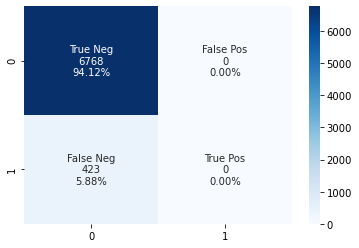

In [67]:
#visualizing the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

**First having a look again which is the dependend variable (here its offer accepted Yes/No)**<br/>
0 = No - does not accept offer<br/>
1 = Yes - accepts offer<br/><br/>

**Explanations**<br/>
TN(True negative,0/0) - model predict its No and it is No for 6789 values<br/>
FN(False negative,1/0) - model predict its Yes, but its No for 401 values<br/>
FP(False positive,0/1) - model predict its No, but its Yes for 0 values<br/>
TP(True positive,1/1) - model predict its Yes and it is Yes for 0 values<br/><br/>

**Conclusion**<br/>
**FP** - It great, as its 0%.<br/>
**FN** - 5% is not ideal, but still quiet ok.<br/>
**TN** - This is great, 94% are correctly predicted.<br/>
**TP** - Here is the real issue, because we dont have any true positive (correct predicted offers accepted), we cannot really predict if somebody will actually accept the offer.
THis however is the cruicial part for the business case. It is good to know, that we can correctly predict if a customer will decline the offer, however we need to get more insights on the customers who accept the offers to see how we can convince the customers, who are declining at the moment.<br/>
This is why we need to improve our TP value in the next iteration.<br/>
This can be done by balancing our data for the offer accept feature. As of now it is heavily imbalanced and therefor we were not surprised by the outcome of the confusion amtrix.

#### ROC/AUC

In [68]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

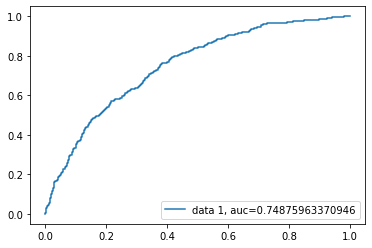

In [69]:
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**ROC Curve**
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

- the closer to left hand corner the better
- should not be below red line

**AUC** - area under the curve the bigger the area under the curve the better the model
1 represents perfect classifier, and 0.5 represents a worthless classifier.<br/>
AUC = 0.75

**Conclusion**
Our ROC and AUC are for the first iteration quite ok. But they can definitly be improved!
For the next iteration the AUC should increase and the ROC should be getting closer to the left corner.

## 2. Iteration

We are going to try to improve our model by balancing our target feature using the SMOTE sampling technique. <br/>
SMOTE (Synthetic Minority Oversampling Technique) is an over sampling technique based on nearest neighbors that adds new points between existing points.

We will proceed as follows:
- import smothe
- define variable
- recreate X and y using smote and resample over X an y
- look at value counts
- re do train test split
- re do model
- re do accuracy/confusion matrix/ROC/AUC
- comparision iterations

In [70]:
#import smothe
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [71]:
#define smote variable
smote = SMOTE()

In [72]:
#recreate X and y
X_i2, y_i2 = smote.fit_resample(X, y)
y_i2.value_counts()

1    16955
0    16955
Name: offer_accepted_Yes, dtype: int64

In [73]:
#redo train test split it2
X_i2_train, X_i2_test, y_i2_train, y_i2_test =train_test_split(X_i2, y_i2, test_size= 0.4, random_state=40)

In [74]:
#apply model it2 
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_i2_train, y_i2_train)

In [75]:
#accuracy assessment it2
predictions = classification.predict(X_i2_test)
accuracy_score(y_i2_test, predictions)

0.7079032733706871

**Comparision accuracy it1 and it2**

accuracy it1 = 0.74<br/>
accuracy it2 = 0.70<br/><br/>

The accuracy of the model actually decreased from the first to the second iteration. This is unfortunate, but somehow expected as we are introducing bias with the implementation of the SMOTE technique.

In [76]:
#building new confusion matrix for it2
cnf_matrix_i2 = confusion_matrix(y_i2_test, predictions)
cnf_matrix_i2

array([[4568, 2140],
       [1822, 5034]])

<AxesSubplot:>

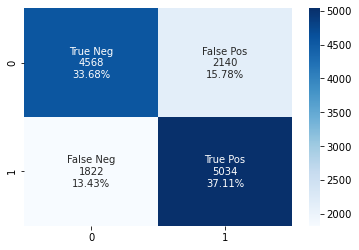

In [77]:
#visualizing confusion matrix for it2
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix_i2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix_i2.flatten()/np.sum(cnf_matrix_i2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_i2, annot=labels, fmt='', cmap='Blues')

**Comparision confusion matrix it1 and it2**

**confusion matrix it1**<br/>
TN 6789 <br/>
FN 401 <br/>
FP 0 <br/>
TP 0 <br/>

TN + TP = 94,12%<br/>
FP + FN =  5,88%<br/>

**confusion matrix it2**<br/>
TN 4568 <br/>
FN 1822 <br/>
FP 2140 <br/>
TP 5034 <br/>

TN + TP = 70,79%<br/>
FP + FN = 29,21%<br/>

The confusion matrix changed from iteration 1 to 2. The True Values are now more evenly distributed between each other. Unfortunatly however the total percentage of the true values decreased by approx 1/4, which is not ideal.
The fals predicted values increased significantly.

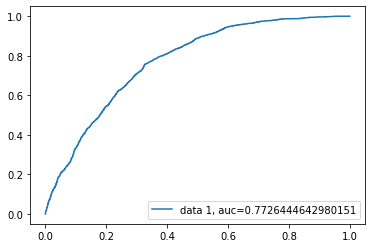

In [80]:
#calculating and visualizing ROC and AUC for it2
y_pred_proba = classification.predict_proba(X_i2_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_i2_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_i2_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Comparision ROC & AUC it1 and it2**

AUC it1 = 0.74<br/>
AUC it2 = 0.77<br/><br/>

The ROC and AUC of the model actually improved.
The ROC is slidly closer to the upper left corner, which is an improvement.
THe AUC increased by 0.03 points, which is a good development.

### Conclusion

After looking at the metrics for evaluation of the model from the second iteration we can say that overall the accuracy decreased and the confusion matrix worsened but the ROC and AUC increased/improved.
We still see this as an improvement in general although accuracy decreased.
The next step will be another iteration in which we are aiming for a increades accuracy.